In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

import importlib

import src.src_current_measurement_simulations
importlib.reload(src.src_current_measurement_simulations)
from src.src_current_measurement_simulations import CurrentMeasurementSimulation


import src.src_current_measurement_fits
importlib.reload(src.src_current_measurement_fits)
from src.src_current_measurement_fits import modify_initial_state, J_to_beamsplitter_time



In [2]:
importlib.reload(src.src_current_measurement_simulations)
from src.src_current_measurement_simulations import CurrentMeasurementSimulation

measurement = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, times, readout_pair_1, readout_pair_2, initial_detunings=initial_detunings, 
                 measurement_detuning=measurement_detuning, measurement_J=measurement_J, measurement_J_parallel=measurement_J_parallel, psi0=psi0, print_logs=True)


modify_kwargs = {}
modify_kwargs['add_phase'] = True
modify_kwargs['pairs'] = [readout_pair_1, readout_pair_2]
modify_kwargs['phases'] = [np.pi/2, np.pi/2]
modify_kwargs['phases'] = [0, 0]


measurement.psi0 = modify_initial_state(measurement, print_logs=True, **modify_kwargs)
measurement.run_simulation(True)


NameError: name 'num_levels' is not defined

In [36]:
importlib.reload(src.src_current_measurement_simulations)
from src.src_current_measurement_simulations import CurrentMeasurementSimulation

### parameters

num_levels = 3
num_qubits = 4

J = -7 * 2 * np.pi
J_parallel = 7 * 2 * np.pi

U = -180 * 2 * np.pi

initial_detunings = np.array([0, 0, 0, 0]) * 2 * np.pi

readout_pair_1 = [0,1]
readout_pair_2 = [2,3]

times = np.linspace(0, 0.2, 1001)

measurement_detuning = np.array([300, 300, -300, -300]) * 2 * np.pi

measurement_J = np.copy(J)
measurement_J_parallel = np.copy(J_parallel)

num_particles = 2
psi0 = -1

measurement = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, times, readout_pair_1, readout_pair_2, initial_detunings=initial_detunings, 
                 measurement_detuning=measurement_detuning, measurement_J=measurement_J, measurement_J_parallel=measurement_J_parallel, psi0=psi0, print_logs=True)


modify_kwargs = {}
modify_kwargs['add_phase'] = True
modify_kwargs['pairs'] = [readout_pair_1, readout_pair_2]
# modify_kwargs['phases'] = [np.pi/2, np.pi/2]
modify_kwargs['phases'] = [0, 0]


measurement.psi0 = modify_initial_state(measurement, print_logs=True, **modify_kwargs)

measurement.run_simulation(True)

current_correlation_from_operator = measurement.get_current_correlation_from_operator()
covariance_sum_from_operator = measurement.get_covariance_sum_from_operator()

print(current_correlation_from_operator)



psi0 dims: [[3, 3, 3, 3], [1, 1, 1, 1]]
psi0 is a state vector
initial state before modifying is state vector
adding phase ([0.0, 0.0] pi) to pairs ([[0, 1], [2, 3]])
initial state after modifying is state vector
running simulation
running sesolve
0.10749332675643536
[ 207.93965573  207.81056217  207.42344062 ... -177.56180552 -173.56771952
 -169.35954643]


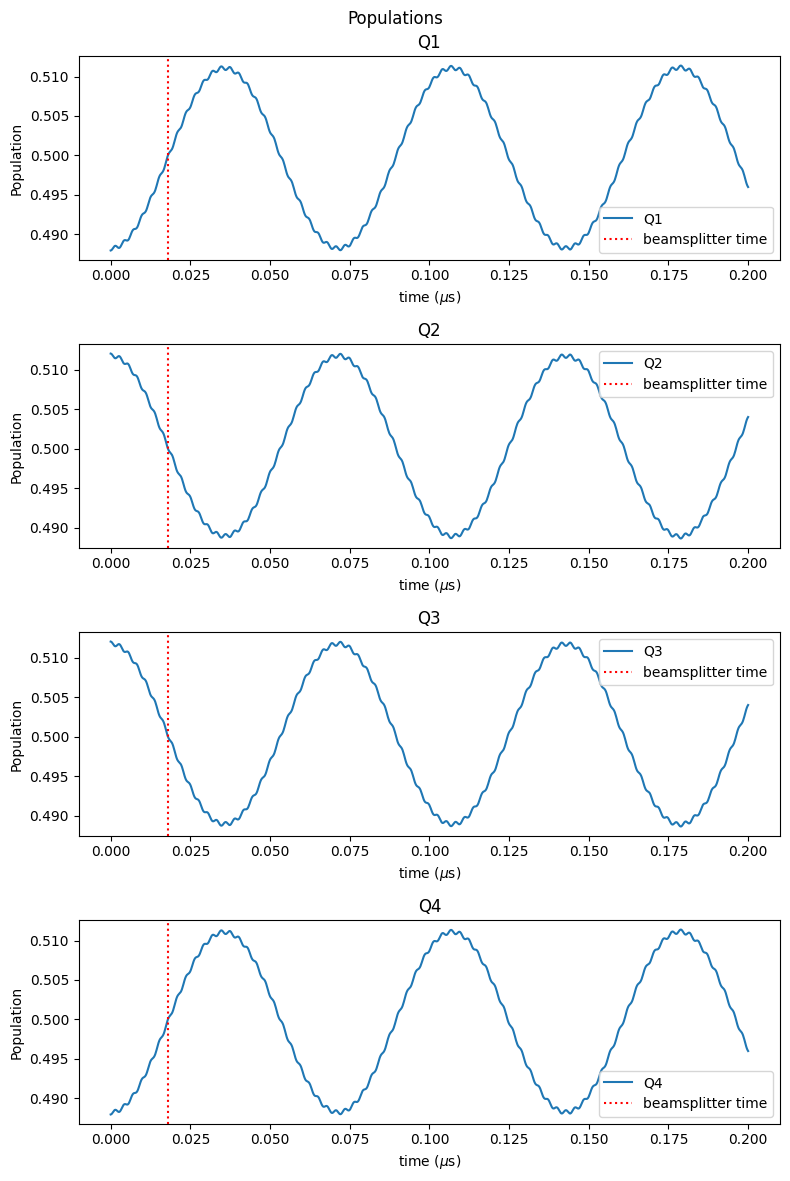

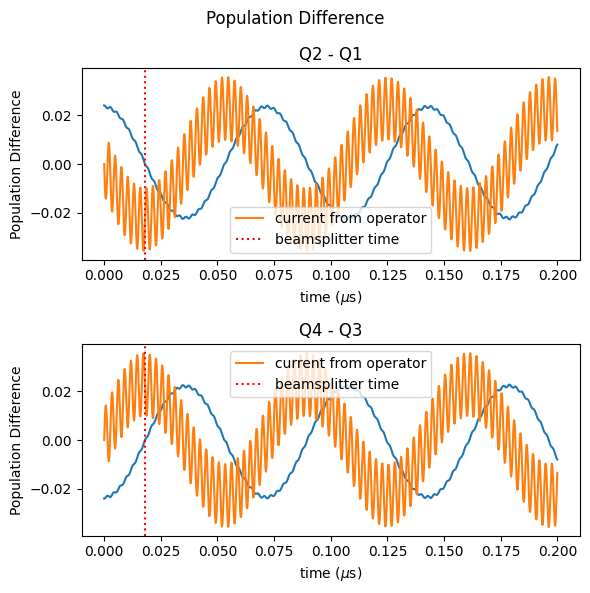

In [37]:
beamsplitter_time = abs(J_to_beamsplitter_time(J))/1e3 # mus

population_average = measurement.get_population_average()
population_difference = measurement.get_population_difference_average()

current_from_operator = measurement.get_current_from_operator()

# population_difference = np.array([population_average[1] - population_average[0], population_average[3] - population_average[2]])

fig, axs = plt.subplots(num_qubits, 1, figsize=(8, 12))
axs = axs.flatten()
for i in range(population_average.shape[0]):
    axs[i].plot(times, population_average[i], label=f'Q{i+1}')

    axs[i].set_xlabel('time ($\mu$s)')
    axs[i].set_ylabel('Population')

    axs[i].set_title(f'Q{i+1}')

    axs[i].axvline(beamsplitter_time, linestyle=':', color='red', label='beamsplitter time')
    axs[i].legend()

plt.suptitle('Populations')
plt.tight_layout()

plt.show()

# population difference
fig, axs = plt.subplots(num_qubits//2, 1, figsize=(6, 6))
axs = axs.flatten()
for i in range(population_difference.shape[0]):
    axs[i].plot(times, population_difference[i])

    axs[i].set_xlabel('time ($\mu$s)')
    axs[i].set_ylabel('Population Difference')

    axs[i].set_title(f'Q{2*i+2} - Q{2*i+1}')

    axs[i].plot(times, current_from_operator[i]/J, label='current from operator')

    axs[i].axvline(beamsplitter_time, linestyle=':', color='red', label='beamsplitter time')
    axs[i].legend()

plt.suptitle('Population Difference')
plt.tight_layout()

plt.legend()
plt.show()

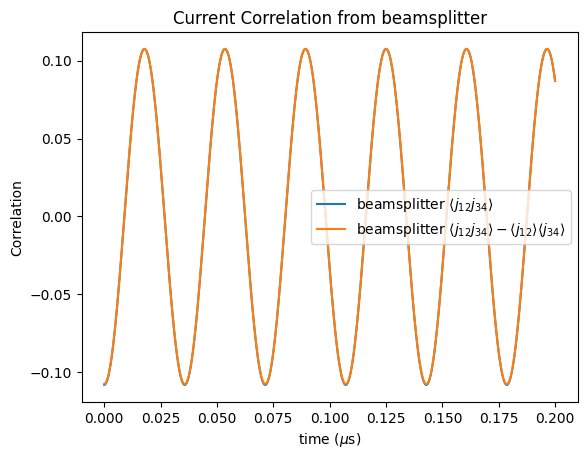

In [38]:
current_correlation = measurement.get_current_correlation()
covariance_sum = measurement.get_covariance_sum()
# current_correlation_from_operator = measurement.get_current_correlation_from_operator()

plt.plot(times, current_correlation, label=r'beamsplitter $\langle j_{12} j_{34}\rangle$')
plt.plot(times, covariance_sum, label=r'beamsplitter $\langle j_{12} j_{34}\rangle - \langle j_{12} \rangle \langle j_{34} \rangle$')
# plt.plot(times, current_correlation_from_operator/(J**2), label=r'operator $\langle j_{12} j_{34}\rangle$')
# plt.plot(times, covariance_sum_from_operator/(J**2), label=r'operator $\langle j_{12} j_{34}\rangle - \langle j_{12} \rangle \langle j_{34} \rangle$')

plt.xlabel('time ($\mu$s)')
plt.ylabel('Correlation')

# plt.title('Current Correlation from beamsplitter and direct operator measurement')
plt.title('Current Correlation from beamsplitter')

plt.legend()
plt.show()


In [196]:
# psi_no_phase = measurement.psi0
# psi_phase = measurement.psi0

current_correlator = measurement.current_correlator

print(f'no phase current correlation: {qt.expect(current_correlator, psi_no_phase)/(J**2)}')
print(f'phase current correlation: {qt.expect(current_correlator, psi_phase)/(J**2)}')


no phase current correlation: 0.3682564539716979
phase current correlation: 0.7890119339007206


In [39]:
covariance_no_phase = measurement.get_covariance_sum()
covariance_no_phase_operator = measurement.get_covariance_sum_from_operator()

correlation_no_phase = measurement.get_current_correlation()
correlation_no_phase_operator = measurement.get_current_correlation_from_operator()

# covariance_with_phase = measurement.get_covariance_sum()
# covariance_with_phase_operator = measurement.get_covariance_sum_from_operator()

# correlation_with_phase = measurement.get_current_correlation()
# correlation_with_phase_operator = measurement.get_current_correlation_from_operator()

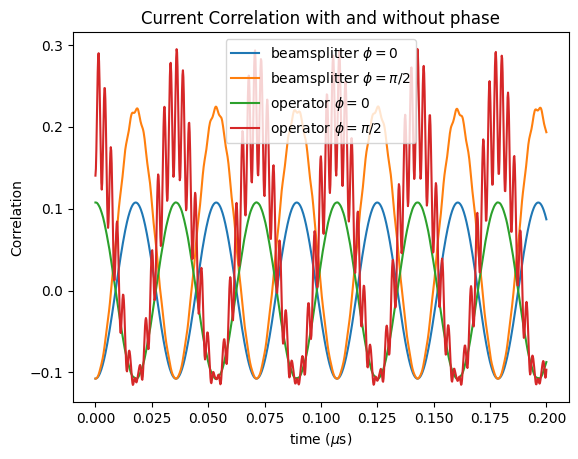

In [203]:

plt.plot(times, covariance_no_phase, label=r'beamsplitter $ \phi = 0$')
plt.plot(times, covariance_with_phase, label=r'beamsplitter $ \phi = \pi/2$')

plt.plot(times, covariance_no_phase_operator/(J**2), label=r'operator $ \phi = 0$')
plt.plot(times, covariance_with_phase_operator/(J**2), label=r'operator $ \phi = \pi/2$')

plt.xlabel('time ($\mu$s)')
plt.ylabel('Correlation')

plt.title('Current Correlation with and without phase')

plt.legend()
plt.show()


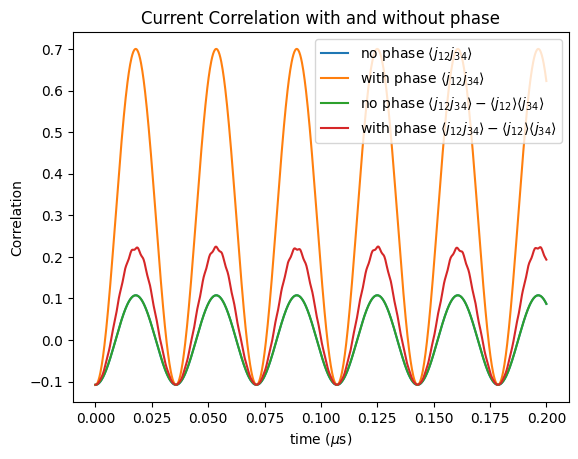

In [40]:

plt.plot(times, correlation_no_phase, label=r'no phase $\langle j_{12} j_{34}\rangle$')
plt.plot(times, correlation_with_phase, label=r'with phase $\langle j_{12} j_{34}\rangle$')

plt.plot(times, covariance_no_phase, label=r'no phase $\langle j_{12} j_{34}\rangle - \langle j_{12} \rangle \langle j_{34} \rangle$')
plt.plot(times, covariance_with_phase, label=r'with phase $\langle j_{12} j_{34}\rangle - \langle j_{12} \rangle \langle j_{34} \rangle$')



plt.xlabel('time ($\mu$s)')
plt.ylabel('Correlation')

plt.title('Current Correlation with and without phase')

plt.legend()
plt.show()


In [ ]:

plt.plot(times, covariance_no_phase, label=r'beamsplitter $ \phi = 0$')
plt.plot(times, covariance_with_phase, label=r'beamsplitter $ \phi = \pi/2$')

plt.plot(times, covariance_no_phase_operator/(J**2), label=r'operator $ \phi = 0$')
plt.plot(times, covariance_with_phase_operator/(J**2), label=r'operator $ \phi = \pi/2$')

plt.xlabel('time ($\mu$s)')
plt.ylabel('Correlation')

plt.title('Current Correlation with and without phase')

plt.legend()
plt.show()
